## PROJET 5 : DETECTION DES FAUX BILLETS

### OBJECTIF : Faire une analyse multivariée a l'aide de l'acp pour supprimer les variables trop correlé et Creer un model capable de detecter un faux billet

## SOMMAIRE
#### <a href="#resume"> 1-RESUME </a>
#### <a href="#forme"> 2-ANALYSE DE LA FORME</a>
#### <a href="#fond"> 3-ANALYSE DU FOND </a>

##### Importons d'entré de jeu toutes nos biblithèques 

In [751]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [752]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None)

In [753]:
sns.set(style='white', context='notebook', # Styles de Seaborn
        palette=['#ff5252', '#1de9b6'])
#mpl.rcParams["figure.figsize"] = (9,6)

### <a id="resume"> 1-RESUME </a>

### A- Analyse de la forme
#### -Le  dataframe contenant les informations sur les billets :
- Nombre de ligne : 1500  
- Nombre de colonne : 7 nommées : is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length  
- Donc notre Dataframe toutes les colonnes ne contiennent pas de valeurs NAN sauf la colonne 37 valeurs NAN soit un pourcentage de 3,7%     
- Notre dataframe est contitué  à 87% des vraiable réels et à 14,3% de valeurs booléennes. 
-  Notre dataframe ne contient pas de valeurs dupliquées  
- La colonne is_denuine est constituées à 66,7% de valeurs True et 33,3% de valeurs False  
- Nous remarquons qu'ils ya pas de valeurs qui s'éloignent fortement des autres 
-  On remarque que certaines variables sont correlées : la variables is_genuine et la variable length, la variable margin_low et length sont correlés négativement de meme que les variables is_genuine et margin_up et margin_low et is genuine.    
- La moyenne des informations de chaque variables : is_genuine :  0.666667, diagonal:171.958440, height_left: 104.029533,height_right: 103.920307,margin_low: 4.483175;margin_up:  3.151473,length:112.678500.  

### B- Analyse du fond  

#### i- ACP
- Variance conservée par chaque plan : Le premier plan factoriel contient 0.43190734% des informtions, le second 0.16958609% , le troisièmes 0.13018912% et le quatrième 0.11824516%.     
- La reduction de la dimensionlité conserve 84,99% des informations contenu dans les données originales.  
#### ii-Analyse du cercle de corrélation
- -Nous remarquons que les deux variables height_left et height_right sont très correlées je vais donc supprimer l'une d'elle avant d'appliquer mon model de classification.    
- Les variables margin_up et margin_low sont corrélés mais comme la variable margin_up n'est pas bien représentée j'ai decidé de ne pas les supprimer.  
- Les variables length, diagonal, height_left et margin_low sont bien représentées tandis que les variables margin_up et height_right ne sont pas bien représentées sur le premier plan factoriel.  
- La variable diagonal contribue fortement sur F2, les variable margin_up;margin_low  contribue fortement a l'axe F1 et la variable length contribue négativement sur la variable F1.  
#### iii-Clustering avec KMeans
- La méthode des coudes et le coefficient de silhouette nous donne le nombre de clusters optimal : 2 clusters donc par la suite je vais classer en 2 clusters  
- Nous remarquons que les clusters obtenu coincide presque avec les informations réelles. Donc le model a su bien classer les billets en deux bloc(vrai billet et faux billet)
#### iv-Prediction nature du billet 
- l'algorithme des K voisins est capable de présire la nature du billet avec un niveau de confiance de 98,66%   
- Donc notre model avec le GradientBoostingClassifier est capable de présire la nature du billet avec un niveau de confiance de 99%  
#### v-Analysons la performence de notre model avec la courbe de ROC et la matrice de corrélation
- Notre model a une   très bonne performence puisque la courbe de ROC est très éloigné de la première bissectrice  
- D'après la matrice de confusion on a 98 vrai positifs, 2 Faux positif, 1 faux negatif et 199 vrai négatif. Donc notre model a prédit correctemment presque toutes les valeurs du dataframe de test sauf 3 cas ou il s'est trompé soit une précision de 99% (Sur 300 valeurs prédite 297 sont correctes et 3 sont incorrects) . 
#### iv-Application de notre model a d'autre billet : methode des grandientboosting
- <a href='#r'>Resultat</a>

### <a id="forme">  2-ANALYSE DE LA FORME </a>

### a-Analyse du dataframe contenant les information sur le billet

In [754]:
data=pd.read_csv("billets1.csv", sep=";",engine = "python")
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [755]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Text(0.5, 1.0, 'Repatition des types de variable')

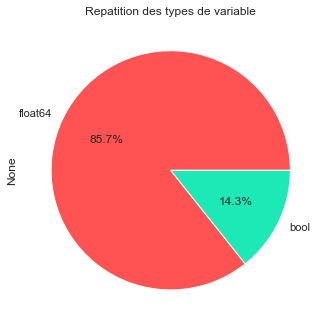

In [756]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Repatition des types de variable')

<b>conclusion</b> : Notre dataframe est contitué  à 87% des vraiable réels et à 14,3% de valeurs booléennes.

In [757]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [758]:
#plt.bar(data.margin_low,data.cases,yerr=data.margin_low)

Text(0.5, 1.0, 'Repartition des erreurs dans le dataframe')

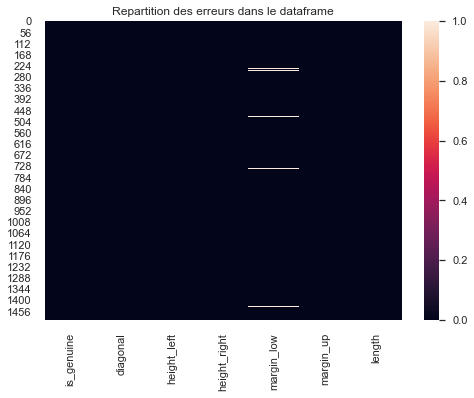

In [759]:
sns.heatmap(data.isna())
plt.title('Repartition des erreurs dans le dataframe')

In [760]:
valeurnull=data[data['margin_low'].isna()]
valeurnull.head(37)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


<b>conclusion</b> : Donc notre Dataframe toutes les colonnes ne contiennent pas de valeurs NAN sauf la colonne 37 valeurs NAN soit un pourcentage de 3,7%

In [761]:
data.duplicated().value_counts()

False    1500
dtype: int64

<b>conclusion</b> : Notre dataframe ne contient pas de valeurs dupliquées

#### Remplacons Les valeurs NAN En utilisant la regression lineaire

In [762]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [763]:
data_model=data.drop(valeurnull.index,axis=0)
data_model['is_genuine'].replace([True,False],[1,0],inplace=True)
x=data_model.drop(['margin_low'],axis=1)
y=data_model['margin_low']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)

(1170, 6)
(293, 6)


In [764]:
#param_boost={'n_estimators':[100,300],'max_features':['sqrt','log2'],'max_depth':np.arange(1,8),'criterion':['mae','friedman_mse']}
#gridB=GridSearchCV(GradientBoostingClassifier(),param_boost,cv=5,n_jobs=-1)
#gridB.fit(xtrain,ytrain)
#print('meilleur paramètre',gridB.best_params_)
#print('Meilleur estimateur',gridB.best_estimator_)
#modelgb= GradientBoostingClassifier(max_depth=2,n_estimators=100,max_features='sqrt')
#modelgb.fit(xtrain,ytrain)
#modelgb.score(xtest,ytest)

In [765]:
from sklearn.ensemble import RandomForestRegressor

modelR=RandomForestRegressor()
modelR.fit(xtrain,ytrain)
modelR.score(xtest,ytest)

0.6263139568266582

In [766]:
def vision (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    val=modelR.predict(liste)
    return val

In [767]:
liste_predic=valeurnull.drop(['margin_low'],axis=1)
liste_predic=liste_predic.reset_index(drop=True)

In [768]:
liste_predic['is_genuine'].replace([True,False],[1,0],inplace=True)

In [769]:
liste_val=valeurnull.index
valeurs=[]
j=0
for i in liste_val:
    data.iloc[i,4]=vision(liste_predic.iloc[j,:])
    j=j+1

In [770]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [771]:
verif=data.iloc[liste_val,:]
verif.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.0850,3.25,112.79
99,True,171.93,104.07,104.18,4.0543,3.14,113.08
151,True,172.07,103.80,104.38,4.1038,3.02,112.93
197,True,171.45,103.66,103.80,3.9683,3.62,113.27
241,True,171.83,104.14,104.06,4.2035,3.02,112.36


#### Taux de mauvais biellets et de billets corrects

In [772]:
data['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

<AxesSubplot:ylabel='is_genuine'>

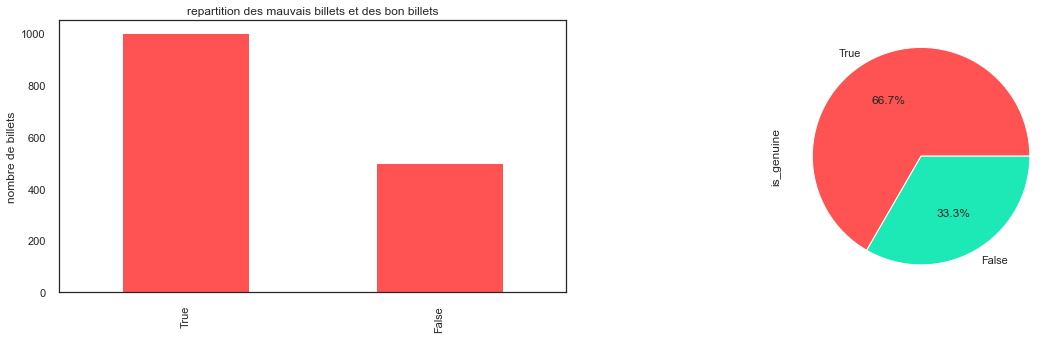

In [773]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
data['is_genuine'].value_counts().plot(kind='bar')
plt.title('repartition des mauvais billets et des bon billets')
plt.ylabel('nombre de billets')
plt.subplot(1,2,2)
data['is_genuine'].value_counts().plot.pie(autopct='%1.1f%%')

<b>conclusion</b> : La colonne is_denuine est constituées à 66,7% de valeurs True et 33,3% de valeurs False

#### Observons d'entre de jeu une simple statistique des variables quantitatives 

In [774]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.48343,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.66016,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.98000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.02000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.31000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.87000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.90000,3.910000,114.44000


#### Déterminons la moyenne de chaque variables caractérisant le billets

In [775]:
data.mean()

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.483430
margin_up         3.151473
length          112.678500
dtype: float64

#### Analyse des valeurs aberantes 

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

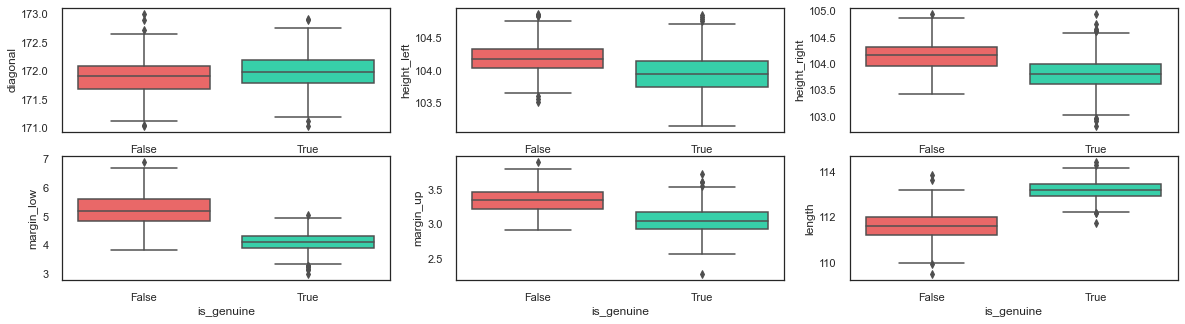

In [776]:
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.boxplot(data=data,x='is_genuine',y='diagonal')
plt.subplot(2,3,2)
sns.boxplot(data=data,x='is_genuine',y='height_left')
plt.subplot(2,3,3)
sns.boxplot(data=data,x='is_genuine',y='height_right')
plt.subplot(2,3,4)
sns.boxplot(data=data,x='is_genuine',y='margin_low')
plt.subplot(2,3,5)
sns.boxplot(data=data,x='is_genuine',y='margin_up')
plt.subplot(2,3,6)
sns.boxplot(data=data,x='is_genuine',y='length')


<b>conclusion</b> : Nous remarquons qu'ils ya pas de valeurs qui s'éloignent fortement des autres 

#### Observons les corrélations entre les variables à l'aide d'une courbe avec une table des corrélations

Text(0.5, 1.0, 'corrélation entre les variables')

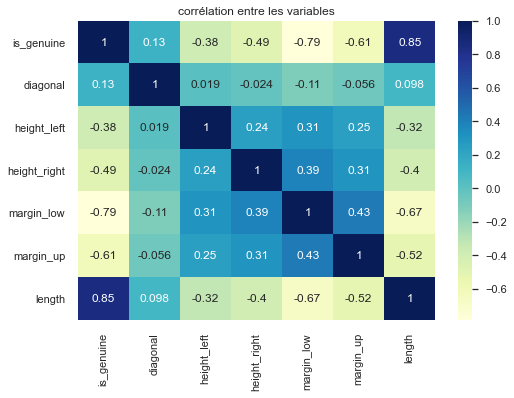

In [777]:
corr=data.corr()
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title('corrélation entre les variables')

Text(0.5, 1.0, 'corrélation entre la variable is_genuine et les autres variables')

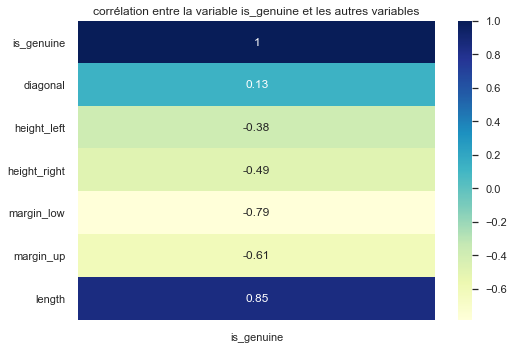

In [778]:
sns.heatmap(corr[['is_genuine']],annot=True,cmap='YlGnBu')
plt.title('corrélation entre la variable is_genuine et les autres variables')

<b>conclusion</b> : On remarque que certaines variables sont correlées : la variables is_genuine et la variable length, la variable margin_low et length sont correlés négativement de meme que les variables is_genuine et margin_up et margin_low et is genuine.

#### Observons les corrélations entre les variables à l'aide d'une courbe avec un pairplot

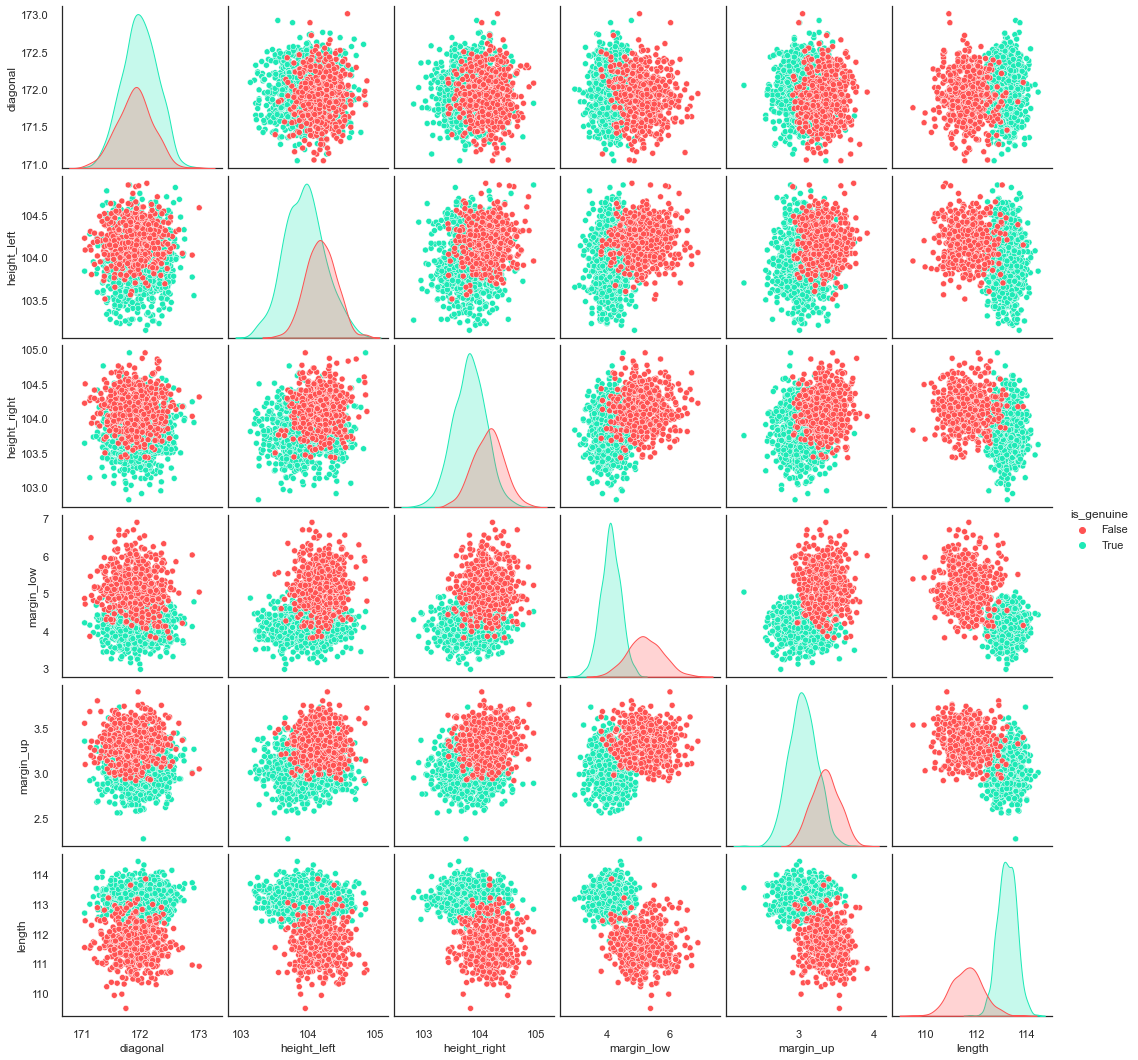

In [779]:
sns.pairplot(data=data,hue='is_genuine')

### <a id="fond">  3-ANALYSE DU FOND </a>

#### Remplacons les valeurs True et False de la variable is_genuine par les nombres 0 et 1

In [780]:
data_prep=data.copy()
data_prep['is_genuine'].replace([True,False],[1,0],inplace=True)
#data_prep.loc(data_prep['is_genuine']=='False','is_genuine')=0
#data_prep.loc(data_prep['is_genuine']=='True','is_genuine')=1
data.drop('is_genuine',axis=1,inplace=True)
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [781]:
data_prep['is_genuine'].unique()

array([1, 0], dtype=int64)

In [782]:
data_pour_modelisation=data_prep.copy()
data_pour_modelisation.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### a- Appliquons l'ACP 

#### Normalisons d'abord le dataframe 

In [783]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [784]:
scaler=StandardScaler()
data_normalise=scaler.fit_transform(data)
print(data_normalise[:,3])

[ 0.05541473 -1.08105212 -0.12641997 ...  1.55555097  1.04035266
  0.22209653]


#### Appliquons l'acp au dataframe obtenu et resuisons le jeu de donné à quatre dimensions

In [785]:
model_acp=PCA(n_components=4)
data_reduis=model_acp.fit_transform(data_normalise)
print(data_reduis)

[[ 1.64745375  0.74930688  2.39218338  3.18683537]
 [-2.01951166 -2.20694416 -1.00175772  0.07189181]
 [-0.97002877  2.61805586  1.20202169 -0.92334888]
 ...
 [ 1.88771843 -0.60123669 -0.54518116 -0.10058362]
 [ 1.78880051  0.51137627  0.02782428 -0.47384796]
 [ 1.04309373 -1.47021902  0.48290915 -0.68253942]]


In [786]:
#pearsonr(data_reduis[:,0],data_reduis[:,1])

In [787]:
#sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

#### Déterminons l'inertie associéé a chaque plan factorielle et constuisons le diagramme de l'ebouli des valeurs propres

In [788]:
model_acp.explained_variance_ratio_

array([0.43185451, 0.16959261, 0.13018163, 0.11824748])

In [789]:
np.sum(model_acp.explained_variance_ratio_)

0.8498762211663086

<b>conclusion  </b> : La reduction de la dimensionlité conserve 84,99% des informations contenu dans les données originales

In [790]:
table_variance=model_acp.explained_variance_ratio_
n_components=4

In [791]:
np.argmax(np.cumsum(table_variance))>1

True

Text(0.5, 1.0, 'Diagramme de l ebouli des valeurs propre')

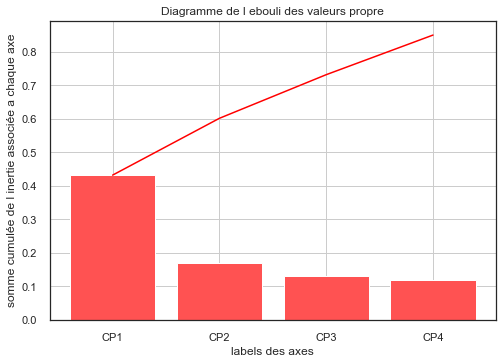

In [792]:
list_acp = ["CP1","CP2","CP3","CP4"]
#n=range(1,n_components+1)
sumcum=np.cumsum(table_variance)
plt.bar(list_acp,table_variance)
plt.plot(list_acp,sumcum,c='red')
plt.grid()
plt.xlabel('labels des axes')
plt.ylabel('somme cumulée de l inertie associée a chaque axe')
plt.title('Diagramme de l ebouli des valeurs propre')

<b>conclusion</b> : Nous remarquons que le premier plan factoriel contient 0.43190734% des informtions, le second 0.16958609% , le troisièmes 0.13018912% et le quatrième 0.11824516%.

#### Affichons les formules de calcule des composantes

In [793]:
model_acp.components_

array([[-0.08514494,  0.33146249,  0.39382895,  0.50632347,  0.43932083,
        -0.52765089],
       [ 0.94104675,  0.30764544,  0.10911856, -0.07430602, -0.00377664,
         0.04840238],
       [-0.28700426,  0.88457611, -0.16682676, -0.10598523, -0.2713657 ,
         0.14983418],
       [-0.10323565, -0.04698641,  0.86658785, -0.09128667, -0.4431152 ,
         0.17741431]])

In [794]:
composantes=pd.DataFrame(model_acp.components_)

In [795]:
composantes.columns=data.columns
composantes.index=['F1','F2','F3','F4']

In [796]:
composantes.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.085145,0.331462,0.393829,0.506323,0.439321,-0.527651
F2,0.941047,0.307645,0.109119,-0.074306,-0.003777,0.048402
F3,-0.287004,0.884576,-0.166827,-0.105985,-0.271366,0.149834
F4,-0.103236,-0.046986,0.866588,-0.091287,-0.443115,0.177414


#### Regardons les corrélations entre les variables et ces composantes principales ou le niveau d'influence de chaque variable sur chaque axe factoriel

Text(0.5, 1.0, 'corrélation entre les variables et chaque axe')

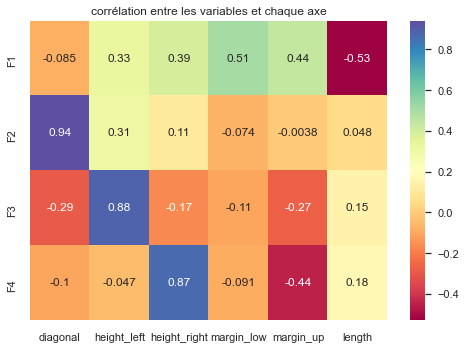

In [797]:
sns.heatmap(composantes,annot=True,cmap='Spectral')
plt.title('corrélation entre les variables et chaque axe')

<b>conclusion</b> : 
- LE 4e plan factoriel est correlé avec la variable heiht_right et correlé négativement avec la varable  margin_up.  
- Le 3e plan factoriel est correlé avec la variable height_left.  
- Le 2e plan factorielle est fortement correlé avec la variable diagonale
- Le 1er plan factorielle est correlé avec la variable margin_low et correlé nagarivement avec la variable length

#### Construisons le cercle de corrélation 

Text(0.5, 1.0, 'Cercle de corrélation')

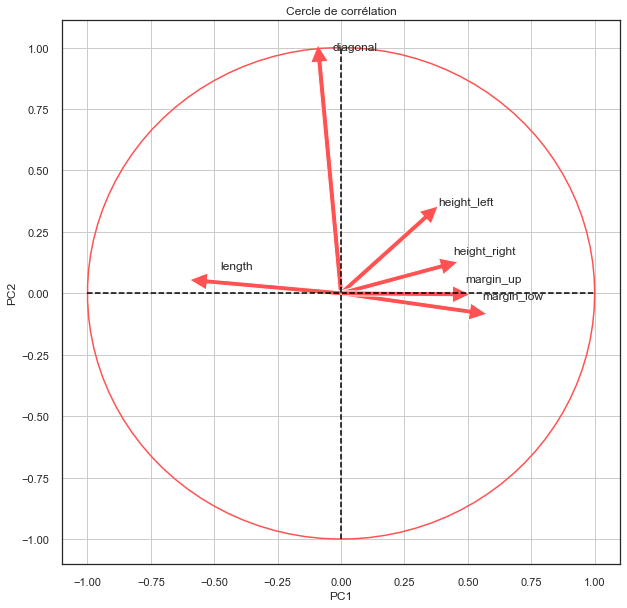

In [798]:
liste_nom=[]
liste_nom=composantes.columns
#Construction du cercle
fig=plt.figure(figsize=(10,10))
x=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(x),np.sin(x))
#Construction des axes
plt.plot([-1,1],[0,0],ls='--',c='black')
plt.plot([0,0],[-1,1],ls='--',c='black')
# Construction des fleches représentant les variables
for i in range(0,composantes.shape[1]):
    plt.arrow(0,0,composantes.iloc[0,i],composantes.iloc[1,i],head_width=0.07,head_length=0.07,width=0.02, )
    plt.text(composantes.iloc[0,i]+0.05,composantes.iloc[1,i]+0.05,liste_nom[i])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')

<b>conclusion  </b> : -Nous remarquons que les deux variables height_left et height_right sont très correlées je vais donc supprimer l'une d'elle avant d'appliquer mon model de classification.  
-Les variables margin_up et margin_low sont corrélés mais comme la variable margin_up n'est pas bien représentée j'ai decidé de ne pas les supprimer  

#### Analyse de la qualité de la représentation de chaque variable dans le 1er plan factoriel

<b>conclusion  </b> : Les variables length, diagonal, height_left et margin_low sont bien représentées tandis que les variables margin_up et height_right ne sont pas bien représentées sur le premier plan factoriel

#### Analyse de la qualité de la contribution aux axes

<b>conclusion  </b> : La variable diagonal contribue fortement sur F2, les variable margin_up;margin_low  contribue fortement a l'axe F1 et la variable length contribue négativement sur la variable F1.

#### Projection des individus sur le plan factoriel 

Text(0.5, 1.0, 'Projection des individu des individus sur le plan factoriel')

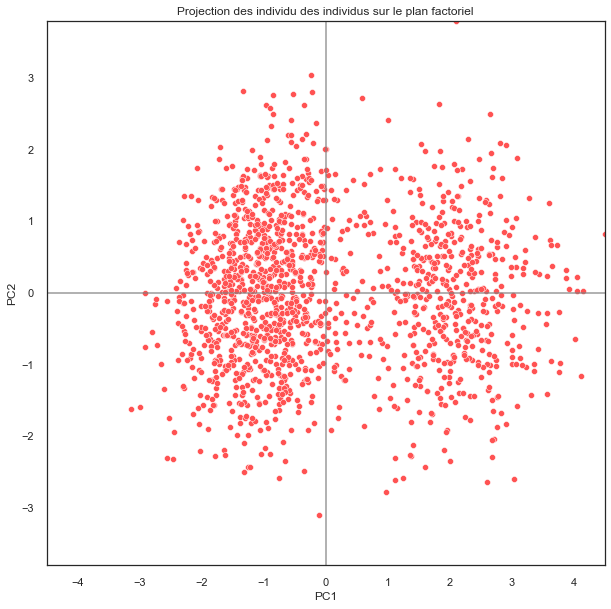

In [799]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x_max=data_reduis[:,0].max()
y_max=data_reduis[:,1].max()

sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

plt.plot([-x_max,x_max],[0,0],c='gray',alpha=0.8)
plt.plot([0,0],[-y_max,y_max],c='gray',alpha=0.8)

ax.set_xlim(left=-x_max,right=x_max)
ax.set_ylim(bottom=-y_max,top=y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individu des individus sur le plan factoriel')

Text(0.5, 1.0, 'Projection des individu des individus sur le plan factoriel')

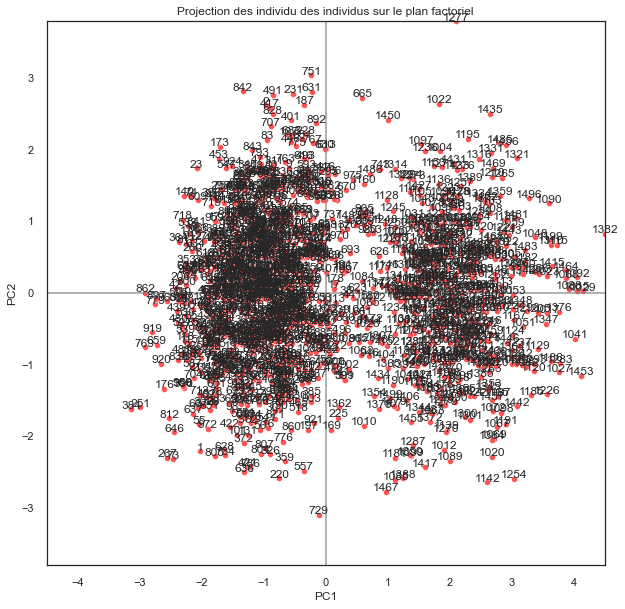

In [800]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x_max=data_reduis[:,0].max()
y_max=data_reduis[:,1].max()

sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

plt.plot([-x_max,x_max],[0,0],c='gray',alpha=0.8)
plt.plot([0,0],[-y_max,y_max],c='gray',alpha=0.8)

ax.set_xlim(left=-x_max,right=x_max)
ax.set_ylim(bottom=-y_max,top=y_max)

labels=data.index
for i in range(0,data_reduis.shape[0]) :
            plt.text(data_reduis[i,0],data_reduis[i,1]+0.05, labels[i], ha='center',va='center') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individu des individus sur le plan factoriel')

In [801]:
data_prep.insert(7,'var_reduis1',data_reduis[:,0])

In [802]:
data_prep.insert(8,'var_reduis2',data_reduis[:,1])

In [803]:
data_prep.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,var_reduis1,var_reduis2
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647454,0.749307
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019512,-2.206944
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.970029,2.618056
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375053,-1.816446
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150543,-0.564627


### Segmentons les individus en clusters

#### Déterminons avec la méthode des coude le nombre optimal de clusters

Text(0.5, 1.0, 'courbe Methode des coudes')

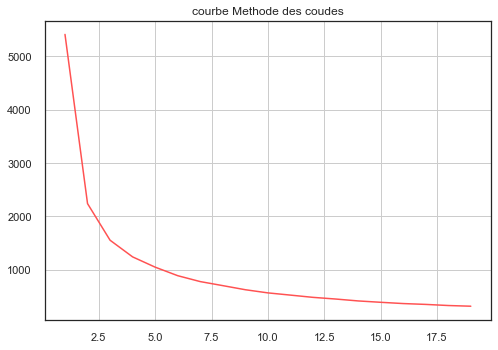

In [804]:
from sklearn.cluster import KMeans
donnr=data_reduis[:,[0,1]]
cout=[]
n=range(1,20)
for i in n :
    model=KMeans(n_clusters=i).fit(donnr)
    cout.append(model.inertia_)
plt.plot(n,cout)
plt.grid()
plt.title('courbe Methode des coudes')

Calcul du coefficient de silhouette

In [805]:
from sklearn.metrics import silhouette_score
for i in range(2,6):
    model_score=KMeans(n_clusters=i)
    model_score.fit(donnr)
    model_score.labels_
    score = silhouette_score(donnr, model_score.labels_, metric='euclidean')
    print("Le score pour",i,"clusters est :",score)

Le score pour 2 clusters est : 0.538317897292422
Le score pour 3 clusters est : 0.4236149690288581
Le score pour 4 clusters est : 0.372603581822321
Le score pour 5 clusters est : 0.3497386380346016


<b>conclusion</b> : La méthode des coudes nous donne 2 clusters donc par la suite je vais classer en 2 clusters

#### Utilisation de la bibliothèque Yellowbrick

Elbow Method

In [806]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

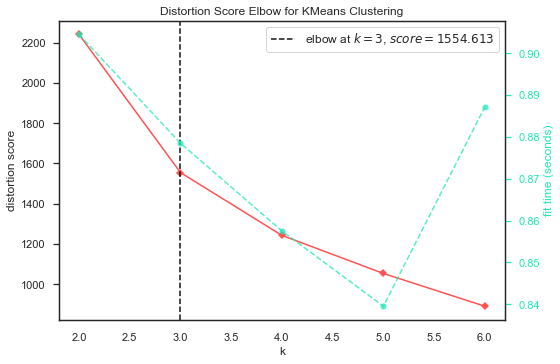

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [807]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7))

visualizer.fit(donnr)    
visualizer.poof() 

Silhouette Visualizer

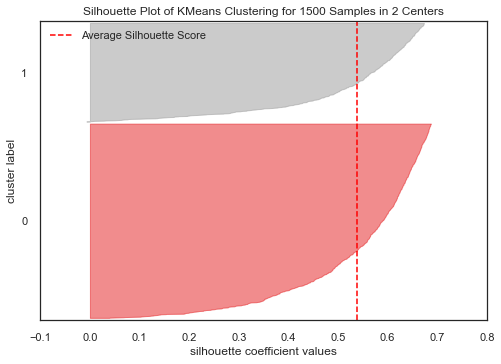

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1500 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [808]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(donnr)    
visualizer.poof()

####  Entrainons le model de classification Kmean

In [809]:
model_clusters=KMeans(n_clusters=2)
model_clusters.fit(donnr)

KMeans(n_clusters=2)

In [810]:
model_clusters.inertia_

2240.975912847127

In [811]:
centroide=model_clusters.cluster_centers_
centroide

array([[ 2.04030556, -0.06113835],
       [-1.03553197,  0.03103002]])

#### Visualisons nos deux clusters obtenu avec leur centroide

Text(0.5, 1.0, 'Regroupements des variables en deux clusters')

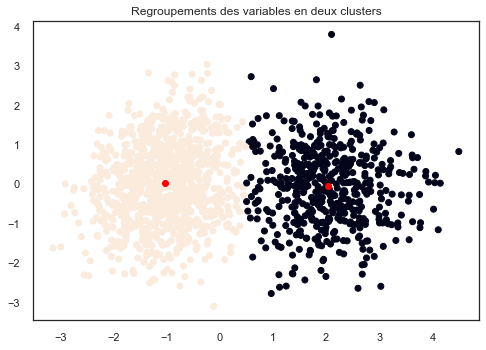

In [812]:
clusters=model_clusters.predict(donnr)
plt.scatter(donnr[:,0],donnr[:,1],c=clusters)
plt.scatter(centroide[:,0],centroide[:,1],c='red')
plt.title('Regroupements des variables en deux clusters')

#### Affichons les deux clusters obtenu et insérons les dans le dataframe de départ

In [813]:
clusters

array([0, 1, 1, ..., 0, 0, 0])

In [814]:
data_prep.insert(9,'cluster',clusters)

In [815]:
data_prep.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,var_reduis1,var_reduis2,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.647454,0.749307,0
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.019512,-2.206944,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.970029,2.618056,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.375053,-1.816446,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.150543,-0.564627,1


<b>conclusion</b> : Nous remarquons que les clusters obtenu coincide presque avec les informations réelles. Donc le model a su bien classer les billets en deux bloc(vrai billet et faux billet).

### c - Model capable de prédire la nature d'un billet

In [816]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr

In [723]:
y=data_pour_modelisation['is_genuine']
x=data_pour_modelisation.drop(['is_genuine'],axis=1)

In [724]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.20)

In [817]:
print(x_test.shape)

(300, 6)


#### Model des forets aléatoire

In [725]:
param_rand={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':np.arange(1,8),'criterion':['gini','entropy']}
gridR=GridSearchCV(RandomForestClassifier(),param_rand,cv=5)
gridR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [726]:
print('meilleur paramètre',gridR.best_params_)
print('Meilleur estimateur',gridR.best_estimator_)

meilleur paramètre {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Meilleur estimateur RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=500)


In [727]:
model=RandomForestClassifier(criterion= 'gini', max_depth= 2, max_features= 'auto', n_estimators= 200)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9866666666666667

<b>conclusion</b> : Donc notre model de Foret aleatoire est capable de présire la nature du billet avec un niveau de confiance de 98,66%

#### Model avec les Kvoisins

In [728]:
n=np.arange(1,20)
param_optimal={'n_neighbors':n,'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_optimal,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [729]:
print('meilleur paramètre',grid.best_params_)
print('Meilleur estimateur',grid.best_estimator_)

meilleur paramètre {'metric': 'euclidean', 'n_neighbors': 5}
Meilleur estimateur KNeighborsClassifier(metric='euclidean')


In [730]:
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9866666666666667

<b>conclusion</b> : Donc notre model avec le K voisins est capable de présire la nature du billet avec un niveau de confiance de 98,66%.

#### Model en utilisant les grandientboostingClassier

In [731]:
param_boost={'n_estimators':[100,300],'max_features':['sqrt','log2'],'max_depth':np.arange(1,8),'criterion':['mae','friedman_mse']}
gridB=GridSearchCV(GradientBoostingClassifier(),param_boost,cv=5,n_jobs=-1)
gridB.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'friedman_mse'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [732]:
print('meilleur paramètre',gridB.best_params_)
print('Meilleur estimateur',gridB.best_estimator_)

meilleur paramètre {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 300}
Meilleur estimateur GradientBoostingClassifier(max_features='log2', n_estimators=300)


In [733]:
modelgb= GradientBoostingClassifier(max_depth=2,n_estimators=100,max_features='sqrt')
modelgb.fit(x_train,y_train)
modelgb.score(x_test,y_test)

0.99

<b>conclusion</b> : Donc notre model avec le GradientBoostingClassifier est capable de présire la nature du billet avec un niveau de confiance de 99%

In [734]:
def predire_test (liste) :
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict(liste)
    print(bool)
    if (bool==0): 
        print('Attention C\'est un faux billet')
    else :
        print('ce billet est correct')

In [737]:
test1=np.array([20,20,0,4,3,13])
predire_test(test1)

[0]
Attention C'est un faux billet


#### Analysons la performence de notre model avec la courbe de ROC et la matrice de corrélation

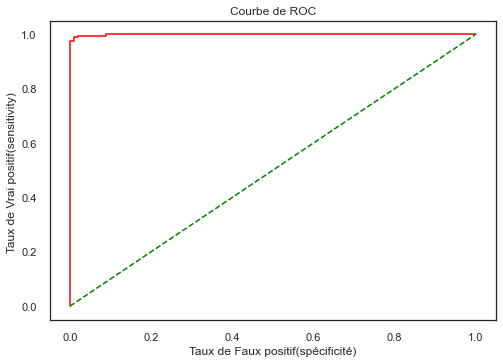

In [738]:
from sklearn.metrics import roc_curve
proba=modelgb.predict_proba(x_test)[:,1]
a,b,t=roc_curve(y_test,proba)
plt.plot(a,b,c='red')
aa=np.linspace(0,1,10)
bb=aa
plt.plot(aa,bb,c='green',linestyle='--')
plt.title('Courbe de ROC')
plt.xlabel('Taux de Faux positif(spécificité)')
plt.ylabel('Taux de Vrai positif(sensitivity) ')
plt.show()

<b>conclusion</b> : Notre jeu a une   très bonne performence puisque la courbe de ROC est très éloigné de la première bissectrice.

Text(0.5, 1.0, 'Matrice de confusion')

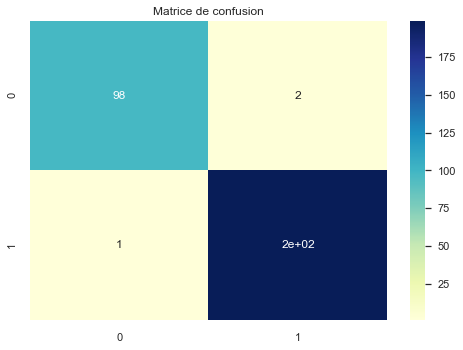

In [818]:
from sklearn.metrics import confusion_matrix
matrix_confu=confusion_matrix(y_true=y_test,y_pred=modelgb.predict(x_test))
sns.heatmap(matrix_confu,annot=True,cmap='YlGnBu')
plt.title('Matrice de confusion')

In [821]:
100-(3/x_test.shape[0])*100

99.0

<b>conclusion</b> : D'après la matrice de confusion on a 98 vrai positifs, 2 Faux positif, 1 faux negatif et 199 vrai négatif. Donc notre model a prédit correctemment presque toutes les valeurs du dataframe de test sauf 3 cas ou il s'est trompé soit une précision de 99% (Sur 300 valeurs prédite 297 sont correctes et 3 sont incorrects) .

### Application : testons notre model sur d'autre billets.

In [832]:
exemple=pd.read_excel('exemple.xlsx')
exemple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [833]:
exemple.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [834]:
exemple_clone=exemple.drop(['id'],axis=1)
exemple_clone.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [835]:
result=modelgb.predict_proba(exemple_clone)
result

array([[9.99112470e-01, 8.87529725e-04],
       [9.99637225e-01, 3.62775473e-04],
       [9.99665530e-01, 3.34469809e-04],
       [7.62650921e-03, 9.92373491e-01],
       [4.51184201e-04, 9.99548816e-01]])

In [836]:
def predire2 (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict(liste)
    if (bool==0): 
        print(0)
    else :
        print(1)

In [837]:
def prediction (ligne) : 
    result=predire2(ligne)
    return result

#### Prediction de la nature de ces billets

In [838]:
#result=exemple_clone.apply(prediction)
fiche=[]
for i in range(0,exemple_clone.shape[0]):
    fiche.append(predire2(exemple_clone.iloc[i,:]))

0
0
0
1
1


In [839]:
table_de_resultat=pd.DataFrame(['Faux','Faux','Faux','vrai','vrai'],columns=['resultat test'],copy=True)

In [840]:
exemple.insert(7,'resultat test',table_de_resultat)
exemple

,diagonal,height_left,height_right,margin_low,margin_up,length,id,resultat test
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,vrai
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,vrai


#### Probabilité de chaque prediction

In [841]:
def prediction_proba (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict_proba(liste)[0,1]
    return bool

In [842]:
#result_proba=exemple_clone.apply(prediction_proba)
#result_proba

fichep=[]
for i in range(0,exemple_clone.shape[0]):
    fichep.append(prediction_proba(exemple_clone.iloc[i,:]))

In [843]:
fichep

[0.0008875297245626877,
 0.00036277547337058424,
 0.00033446980862664394,
 0.9923734907869738,
 0.9995488157992062]

In [844]:
table_de_resultat_proba=pd.DataFrame([0.000887529,0.00036277,0.0003344698,0.99237349,0.9995488],columns=['probabilite test'],copy=True)
exemple.insert(8,'probabilite test',table_de_resultat_proba)

#### Affichons le datframe de l'exemple pour visualiser les prédiction de model avec leur probabilité

<a id='r'>Resultat</a>

In [845]:
exemple

,diagonal,height_left,height_right,margin_low,margin_up,length,id,resultat test,probabilite test
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux,0.000888
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux,0.000363
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux,0.000334
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,vrai,0.992373
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,vrai,0.999549
